__IMPORTING ALL LIBRARIES AND MODELS__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


__TASK 1:__

__Data Exploration and Preprocessing__

•
__Explore the dataset and identify the number of rows and columns.__

•
__Check for missing values in each column and handle them accordingly, considering the larger dataset size.__

•
__Perform data type conversion if necessary, ensuring consistency across the entire dataset.__

•
__Analyse the distribution of the target variable ("stroke") and identify any class imbalances, considering the larger sample size.__

In [4]:
#Printing the number of rows and columns
num_rows = len(df)
num_columns = len(df.columns)
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5110
Number of columns: 12


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
bmi_mean = df['bmi'].dropna().mean()
df['bmi'] = df['bmi'].fillna(bmi_mean)

In [7]:
print(df['stroke'].value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


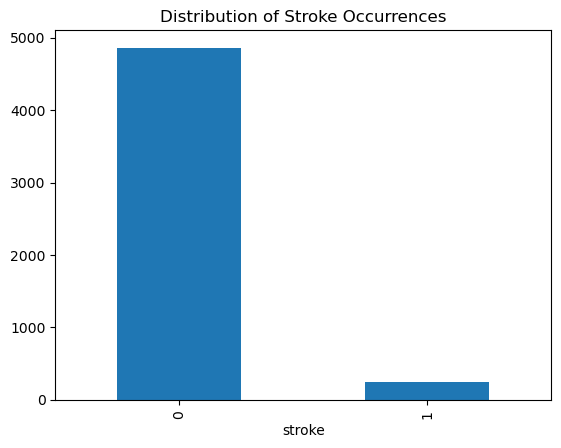

In [8]:
#Analyse the distribution of the target variable ("stroke")
import matplotlib.pyplot as plt

df['stroke'].value_counts().plot(kind='bar')
plt.title('Distribution of Stroke Occurrences')
plt.show()

__TASK 2:__

__Descriptive Analysis__

•
__Calculate comprehensive statistical measures (mean, median, standard deviation, quartiles, etc.) for numerical columns like "age," "avg_glucose_level," and "bmi".__

•
__Explore the distribution of categorical variables like "gender," "hypertension," "heart_disease," "ever_married," "work_type," "Residence_type," and "smoking_status", across the dataset.__

•
__Identify the most prevalent categories or combinations of categories associated with stroke occurrences, leveraging the larger sample size.__

In [9]:
print(df[['age', 'avg_glucose_level', 'bmi']].describe())

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  5110.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.698018
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.800000
50%      45.000000          91.885000    28.400000
75%      61.000000         114.090000    32.800000
max      82.000000         271.740000    97.600000


In [10]:
# Print value counts for categorical variables
print("Gender:")
print(df['gender'].value_counts())

print("\nHypertension:")
print(df['hypertension'].value_counts())

print("\nHeart Disease:")
print(df['heart_disease'].value_counts())

print("\nEver Married:")
print(df['ever_married'].value_counts())

print("\nWork Type:")
print(df['work_type'].value_counts())

print("\nResidence Type:")
print(df['Residence_type'].value_counts())

print("\nSmoking Status:")
print(df['smoking_status'].value_counts())

Gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64

Heart Disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64

Ever Married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Work Type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence Type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Smoking Status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [11]:
# Identify prevalent categories associated with stroke occurrences
stroke_data = df[df['stroke'] == 1]

print("Hypertension:")
print(stroke_data['hypertension'].value_counts())

print("\nHeart Disease:")
print(stroke_data['heart_disease'].value_counts())

print("\nGender:")
print(stroke_data['gender'].value_counts())

print("\nEver Married:")
print(stroke_data['ever_married'].value_counts())

print("\nWork Type:")
print(stroke_data['work_type'].value_counts())

print("\nResidence Type:")
print(stroke_data['Residence_type'].value_counts())

print("\nSmoking Status:")
print(stroke_data['smoking_status'].value_counts())

Hypertension:
hypertension
0    183
1     66
Name: count, dtype: int64

Heart Disease:
heart_disease
0    202
1     47
Name: count, dtype: int64

Gender:
gender
Female    141
Male      108
Name: count, dtype: int64

Ever Married:
ever_married
Yes    220
No      29
Name: count, dtype: int64

Work Type:
work_type
Private          149
Self-employed     65
Govt_job          33
children           2
Name: count, dtype: int64

Residence Type:
Residence_type
Urban    135
Rural    114
Name: count, dtype: int64

Smoking Status:
smoking_status
never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: count, dtype: int64


__TASK 3:__

__Demographic Analysis__

•
__Analyse the distribution of stroke occurrences across different age groups and genders.__

•
__Determine if there is any correlation between residence type (urban/rural) and stroke occurrences.__

•
__Explore the relationship between marital status and stroke occurrences.__

In [28]:
def format_percentage(x):
    return f"{x*100:.2f}%"

stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data = stroke_data[stroke_data['gender'].isin(['Male', 'Female'])]

# Create age categories
bins = [0, 30, 50, 70, 100]
labels = ['Young', 'Middle-aged', 'Elderly', 'Very Elderly']
stroke_data['age_category'] = pd.cut(stroke_data['age'], bins=bins, labels=labels, include_lowest=True)

# Calculate stroke percentage for each age category and gender
stroke_percentage = stroke_data.groupby(['age_category', 'gender'])['stroke'].mean().reset_index()
stroke_percentage = stroke_percentage.pivot_table(index='age_category', columns='gender', values='stroke', aggfunc=lambda x: x.map(format_percentage))
print(stroke_percentage)


gender        Female    Male
age_category                
Young          0.22%   0.00%
Middle-aged    1.69%   1.14%
Elderly        6.29%   7.72%
Very Elderly  17.49%  18.82%


C:\Users\Dell\AppData\Local\Temp\ipykernel_6208\1988204871.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_percentage = stroke_data.groupby(['age_category', 'gender'])['stroke'].mean().reset_index()


In [34]:
# Calculate stroke percentage for each residence type
stroke_percentage = stroke_data.groupby('Residence_type')['stroke'].mean().reset_index()
stroke_percentage['stroke_percentage'] = (stroke_percentage['stroke'] * 100).map('{:.2f}%'.format)
stroke_percentage = stroke_percentage[['Residence_type', 'stroke_percentage']]
print(stroke_percentage)


  Residence_type stroke_percentage
0          Rural             4.53%
1          Urban             5.20%


In [36]:
#Martial status
stroke_percentage = stroke_data.groupby('ever_married')['stroke'].mean().reset_index()
stroke_percentage['stroke_percentage'] = (stroke_percentage['stroke'] * 100).map('{:.2f}%'.format)
stroke_percentage = stroke_percentage[['ever_married', 'stroke_percentage']]
print(stroke_percentage)


  ever_married stroke_percentage
0           No             1.65%
1          Yes             6.56%


__TASK 4:__


__Health Condition Analysis__

•
__Determine the percentage of individuals with hypertension, heart disease, and smoking habits who have had a stroke.__

•
__Compare the average glucose levels and BMI of individuals who have had a stroke with those who have not.__

•
__Analyse the availability of health condition data (hypertension, heart disease, smoking status) among different age groups or genders.__

In [38]:
# Percentage of individuals with conditions who had a stroke
hypertension_stroke = stroke_data[stroke_data['hypertension'] == 1]['stroke'].mean() * 100
heart_disease_stroke = stroke_data[stroke_data['heart_disease'] == 1]['stroke'].mean() * 100
smokers_stroke = stroke_data[stroke_data['smoking_status'] == 'smokes']['stroke'].mean() * 100
print(f"Percentage of hypertensive individuals who had a stroke: {hypertension_stroke:.2f}%")
print(f"Percentage of individuals with heart disease who had a stroke: {heart_disease_stroke:.2f}%")
print(f"Percentage of smokers who had a stroke: {smokers_stroke:.2f}%")

Percentage of hypertensive individuals who had a stroke: 13.25%
Percentage of individuals with heart disease who had a stroke: 17.03%
Percentage of smokers who had a stroke: 5.32%


In [39]:
# Compare average glucose levels and BMI for stroke vs. non-stroke
stroke_glucose = stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'].mean()
non_stroke_glucose = stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'].mean()
stroke_bmi = stroke_data[stroke_data['stroke'] == 1]['bmi'].mean()
non_stroke_bmi = stroke_data[stroke_data['stroke'] == 0]['bmi'].mean()
print(f"Average glucose level for stroke patients: {stroke_glucose:.2f}")
print(f"Average glucose level for non-stroke patients: {non_stroke_glucose:.2f}")
print(f"Average BMI for stroke patients: {stroke_bmi:.2f}")
print(f"Average BMI for non-stroke patients: {non_stroke_bmi:.2f}")

Average glucose level for stroke patients: 132.54
Average glucose level for non-stroke patients: 104.80
Average BMI for stroke patients: 30.47
Average BMI for non-stroke patients: 28.82


In [44]:
import pandas as pd

# Load the dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Filter out 'Others' gender
stroke_data = stroke_data[stroke_data['gender'].isin(['Male', 'Female'])]

# Create age categories
bins = [0, 30, 50, 70, 100]
labels = ['Young', 'Middle-aged', 'Elderly', 'Very Elderly']
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=bins, labels=labels, include_lowest=True)

# Map smoking status to numerical values
smoking_map = {'never smoked': 0, 'formerly smoked': 1, 'smokes': 2}
stroke_data['smoking_status'] = stroke_data['smoking_status'].map(smoking_map)

# Analyze health condition data availability across age groups and genders
health_data_by_age_gender = stroke_data.groupby(['age_group', 'gender'])[['hypertension', 'heart_disease', 'smoking_status']].mean().unstack()
health_data_by_age_gender = health_data_by_age_gender.applymap(lambda x: f"{x*100:.2f}%")
print(health_data_by_age_gender)


             hypertension         heart_disease         smoking_status        
gender             Female    Male        Female    Male         Female    Male
age_group                                                                     
Young               0.79%   0.59%         0.11%   0.15%         54.41%  56.64%
Middle-aged         4.17%   8.94%         0.90%   1.71%         70.35%  80.93%
Elderly            15.97%  16.56%         5.28%  11.74%         70.92%  83.14%
Very Elderly       24.82%  23.69%        14.66%  27.87%         50.15%  78.02%


C:\Users\Dell\AppData\Local\Temp\ipykernel_6208\1593562143.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_data_by_age_gender = stroke_data.groupby(['age_group', 'gender'])[['hypertension', 'heart_disease', 'smoking_status']].mean().unstack()
C:\Users\Dell\AppData\Local\Temp\ipykernel_6208\1593562143.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  health_data_by_age_gender = health_data_by_age_gender.applymap(lambda x: f"{x*100:.2f}%")


__TASK 5__

__Risk Factor Analysis__

•
__Identify the most significant risk factors for stroke occurrences based on the available features.__

•
__Determine the combination of risk factors that contribute most to stroke occurrences.__

•
__Analyse the impact of lifestyle factors (smoking, BMI) on stroke occurrences.__

In [19]:
data['age_group'] = pd.cut(data['age'], bins=range(0, 101, 10), right=False)

age_risk_data = data.groupby('age_group')['stroke'].mean() * 100
print("Risk Factor: Age")
print(age_risk_data)
print()


risk_factors = ['hypertension', 'heart_disease', 'smoking_status', 'bmi']

for factor in risk_factors:
    print(f"Risk Factor: {factor}")
    risk_data = data.groupby(factor)['stroke'].mean() * 100
    print(risk_data.apply(lambda x: f"{x:.2f}%"))
    print()

print("Lifestyle Recommendations:")
print("- Age: Maintain a healthy lifestyle with regular exercise and a balanced diet to support overall health as you age.")
print("- Hypertension: Monitor blood pressure regularly, reduce salt intake, and engage in physical activity to manage hypertension.")
print("- Heart Disease: Follow a heart-healthy diet, exercise regularly, and quit smoking to reduce the risk of heart disease and stroke.")
print("- Smoking Status: Quit smoking to significantly lower the risk of stroke and improve overall health.")
print("- BMI: Maintain a healthy weight through a balanced diet and regular exercise to reduce the risk of obesity-related health issues.")

Risk Factor: Age
age_group
[0, 10)       0.211864
[10, 20)      0.202429
[20, 30)      0.000000
[30, 40)      0.916031
[40, 50)      1.643836
[50, 60)      5.755396
[60, 70)      7.568438
[70, 80)     16.520211
[80, 90)     21.505376
[90, 100)          NaN
Name: stroke, dtype: float64

Risk Factor: hypertension
hypertension
0     3.97%
1    13.25%
Name: stroke, dtype: object

Risk Factor: heart_disease
heart_disease
0     4.18%
1    17.03%
Name: stroke, dtype: object

Risk Factor: smoking_status
smoking_status
Unknown            3.04%
formerly smoked    7.91%
never smoked       4.76%
smokes             5.32%
Name: stroke, dtype: object

Risk Factor: bmi
bmi
10.3    0.00%
11.3    0.00%
11.5    0.00%
12.0    0.00%
12.3    0.00%
        ...  
66.8    0.00%
71.9    0.00%
78.0    0.00%
92.0    0.00%
97.6    0.00%
Name: stroke, Length: 418, dtype: object

Lifestyle Recommendations:
- Age: Maintain a healthy lifestyle with regular exercise and a balanced diet to support overall health as you 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6208\1728280871.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_data = data.groupby('age_group')['stroke'].mean() * 100


In [57]:
import pandas as pd
import numpy as np

# Load the dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Convert 'stroke' column to numerical values
stroke_data['stroke'] = stroke_data['stroke'].map({0: 0, 1: 1})

# Create BMI categories
stroke_data['bmi_category'] = pd.cut(stroke_data['bmi'].replace('N/A', np.nan), bins=[-1, 18.5, 24.9, 29.9, 34.9, np.inf], 
                                     labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II'])

# Analyze the impact of lifestyle factors
lifestyle_impact = stroke_data.groupby(['smoking_status', 'bmi_category'])['stroke'].mean().reset_index()
lifestyle_impact['stroke_percentage'] = (lifestyle_impact['stroke'] * 100).round(2).astype(str) + '%'
print(lifestyle_impact[['smoking_status', 'bmi_category', 'stroke_percentage']])


     smoking_status bmi_category stroke_percentage
0           Unknown  Underweight              0.0%
1           Unknown       Normal             1.23%
2           Unknown   Overweight             3.48%
3           Unknown      Obese I             3.76%
4           Unknown     Obese II             2.35%
5   formerly smoked  Underweight              0.0%
6   formerly smoked       Normal             6.58%
7   formerly smoked   Overweight             6.56%
8   formerly smoked      Obese I             8.44%
9   formerly smoked     Obese II             5.82%
10     never smoked  Underweight             2.86%
11     never smoked       Normal             3.21%
12     never smoked   Overweight             5.41%
13     never smoked      Obese I             4.94%
14     never smoked     Obese II             4.42%
15           smokes  Underweight              0.0%
16           smokes       Normal             3.21%
17           smokes   Overweight             6.17%
18           smokes      Obese 

C:\Users\Dell\AppData\Local\Temp\ipykernel_6208\970568355.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifestyle_impact = stroke_data.groupby(['smoking_status', 'bmi_category'])['stroke'].mean().reset_index()


__TASK 6__

__Feature Engineering__

•
__Extract additional features from the existing columns, such as age group categories or BMI categories.__

•
__Create new features by combining existing features (e.g., a feature that combines hypertension, heart disease, and smoking status).__

In [61]:
# Age group categories
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Middle-aged', 'Elderly', 'Very Elderly'])

# BMI categories
stroke_data['bmi_category'] = pd.cut(stroke_data['bmi'], bins=[-1, 18.5, 24.9, 29.9, 34.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'])

# Combined health condition feature
stroke_data['health_condition'] = (stroke_data['hypertension'] + stroke_data['heart_disease'] + (stroke_data['smoking_status'] != 'never smoked')).astype(int)


In [59]:
column_names = stroke_data.columns.tolist()
print(column_names)
#bmi and age grps created

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'bmi_category', 'age_group', 'health_condition']


__Task 7:__

__Task: Predictive Modelling__

•
__Build a classification model to predict the likelihood of stroke based on available features.__

•
__Split the larger dataset into training and testing sets and evaluate the model's performance using appropriate metrics.__

•
__Experiment with different algorithms (e.g., logistic regression, decision trees, random forest) and compare their performance on the dataset.__

In [62]:
stroke_data['bmi_category'] = pd.cut(stroke_data['bmi'], bins=[-1, 18.5, 25, 30, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
X = stroke_data.drop(['stroke', 'id'], axis=1)
y = stroke_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_group', 'bmi_category']
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Train  model
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
for model in models:
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

DecisionTreeClassifier Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.25      0.05      0.08        62

    accuracy                           0.93      1022
   macro avg       0.60      0.52      0.52      1022
weighted avg       0.90      0.93      0.91      1022



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.22      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022



__Task 8__

__Data Visualization__

•
__Create visualizations to represent the distribution of stroke occurrences using different charts (bar plots, pie charts, etc.).__

•
__Compare the stroke occurrences across different age groups, genders, or risk factor combinations using appropriate visualizations.__

•
__Visualize the relationship between various features and the target variable ("stroke") to gain insights.__

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


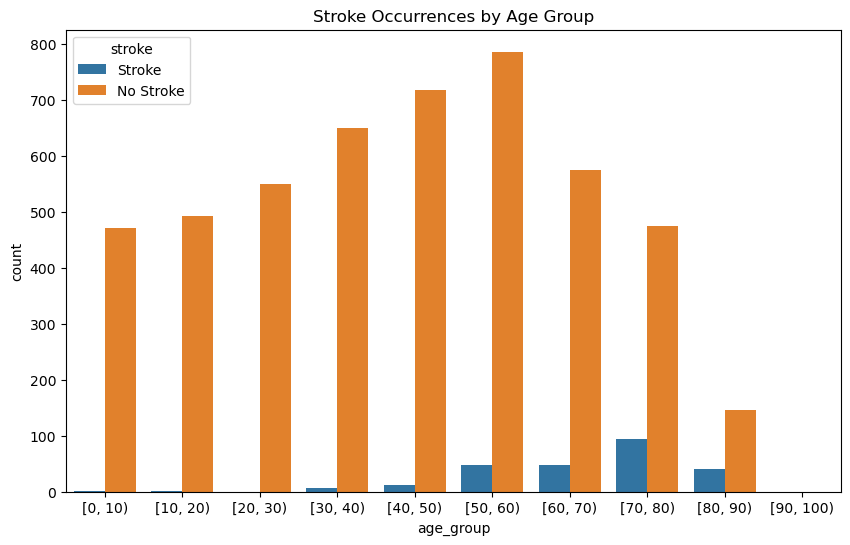

In [63]:
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=range(0, 101, 10), right=False)
stroke_data['stroke'] = stroke_data['stroke'].replace({0: 'No Stroke', 1: 'Stroke'})

# Stroke occurrences across age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='stroke', data=stroke_data)
plt.title('Stroke Occurrences by Age Group')
plt.show()

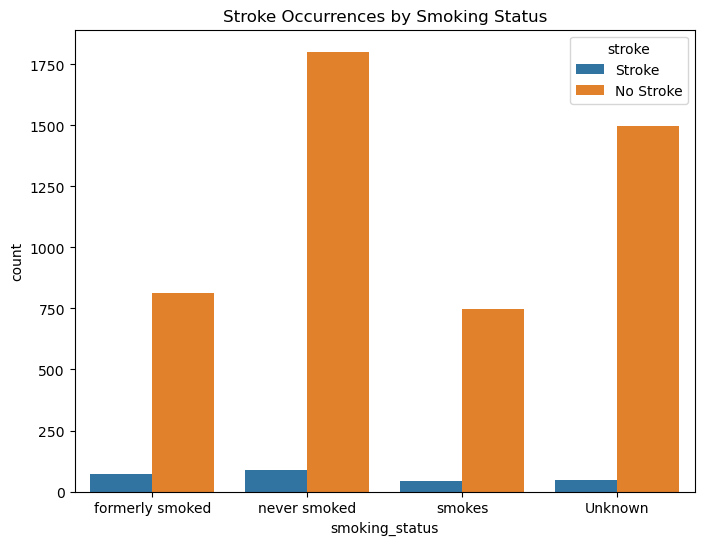

In [64]:
# Stroke occurrences by smoking status
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=stroke_data)
plt.title('Stroke Occurrences by Smoking Status')
plt.show()



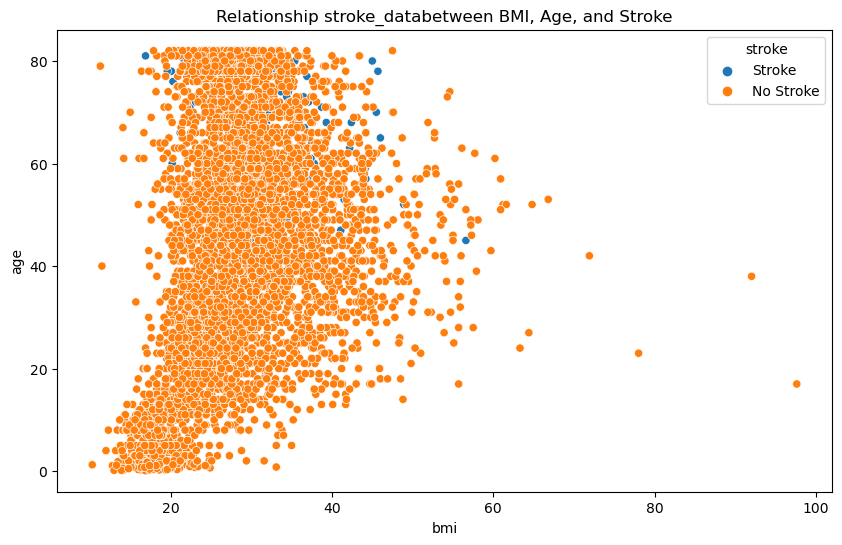

In [65]:
# Relationship between BMI and stroke
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='age', hue='stroke', data=stroke_data)
plt.title('Relationship stroke_databetween BMI, Age, and Stroke')
plt.show()

__Task 9__

__MACHINE LEARNING MODEL TO PREDICT THE CHANCES OF OCCURENCE OF STROKE (ENTER YOUR DETAILS TO CHECK THE CHANCES OF YOU HAVING STROKE)__

In [68]:
warnings.filterwarnings("ignore", category=UserWarning)
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Data preprocessing
data = data.dropna()  

#Encoding Label
le = LabelEncoder()
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)

data['Residence_type'] = data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

# Define features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Training The model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# User input 
gender_input = input("Enter patient's gender (Male or Female): ")
if gender_input.lower() == 'male':
    gender = 1
elif gender_input.lower() == 'female':
    gender = 0
else:
    raise ValueError("Invalid input for gender. Please enter Male or Female.")

age = float(input("Enter patient's age in years: "))
hypertension = int(input("Does the patient have hypertension? (1 = yes, 0 = no): "))
heart_disease = int(input("Does the patient have heart disease? (1 = yes, 0 = no): "))

ever_married_input = input("Has the patient ever been married? (Yes or No): ")
if ever_married_input.lower() == 'yes':
    ever_married = 1
elif ever_married_input.lower() == 'no':
    ever_married = 0
else:
    raise ValueError("Invalid input for ever married. Please enter Yes or No.")

work_type_input = int(input("Enter patient's work type (1: Private, 2: Self-employed, 3: Govt_job, 4: children, 5: Never_worked): "))
residence_type_input = input("Enter patient's residence type (Urban or Rural): ")
if residence_type_input.lower() == 'urban':
    residence_type = 1
elif residence_type_input.lower() == 'rural':
    residence_type = 0
else:
    raise ValueError("Invalid input for residence type. Please enter Urban or Rural.")

avg_glucose_level = float(input("Enter patient's average glucose level (for reference, avg glucose level lies between 70 to 100): "))
weight = float(input("Enter patient's weight in kg: "))
height = float(input("Enter patient's height in cm: "))

# Calculate BMI from weight and height
bmi = weight / ((height / 100) ** 2)

# Predict stroke occurrence probability
user_data = {
    'gender': gender,
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'ever_married': ever_married,
    'work_type': work_type_input,
    'Residence_type': residence_type,
    'avg_glucose_level': avg_glucose_level,
    'weight': weight,
    'height': height,
    'bmi': bmi
}

prediction_probability = model.predict_proba([list(user_data.values())])[0][1]
print()
print("The predicted percentage of stroke occurrence for the patient is {:.2%}.".format(prediction_probability))

Enter patient's gender (Male or Female):  Male
Enter patient's age in years:  34
Does the patient have hypertension? (1 = yes, 0 = no):  1
Does the patient have heart disease? (1 = yes, 0 = no):  1
Has the patient ever been married? (Yes or No):  Yes
Enter patient's work type (1: Private, 2: Self-employed, 3: Govt_job, 4: children, 5: Never_worked):  1
Enter patient's residence type (Urban or Rural):  Urban
Enter patient's average glucose level:  130
Enter patient's weight in kg:  70
Enter patient's height in cm:  170



The predicted percentage of stroke occurrence for the patient is 14.00%.


__Stroke Percentage Range	Risk Level__

__0% - 10%	                ->Low Risk__

__10.01% - 20%	            ->Moderate Risk__

__20.01% - 30%	            ->High Risk__

__Above 30%	                ->Very High Risk__